<a href="https://colab.research.google.com/github/siddharthapramanik771/Gurmukhi-Handwritten-Digit-Classification/blob/main/Gurmukhi_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np
from PIL import Image
from numpy import asarray
import random
from matplotlib import pyplot as plt

In [2]:
class Image_data:
  def __init__(self,root_path):
    self.root_path = root_path
    self.train_X = None
    self.train_Y = None
    self.test_X = None
    self.test_Y = None

  def image_to_array(self,path):
    img = Image.open(path)
    data = asarray(img).astype(int)
    return data.flatten()

  def data_shuffle(self,x,y):
    zipped_list = list(zip(x,y))
    random.shuffle(zipped_list)
    return list(zip(*zipped_list))

  def data_processing(self):
      root_path = self.root_path
      train_X, test_X, train_Y, test_Y = [], [], [], []
      for i in os.listdir(root_path):
          path = root_path + '/' + i
          if not os.path.isdir(path):
            continue
          print('reading files in '+i)
          data_X = []
          data_Y = []
          for j in os.listdir(path):
              print('reading files in '+j)
              new_path = path+'/' + j
              for k in os.listdir(new_path):
                  # print('reading file '+k)
                  data_X.append(self.image_to_array(new_path + '/' + k))
                  data_Y.append(int(j))
          if i == 'train':
              self.train_X = np.array(data_X)
              self.train_Y = np.array(data_Y)
              print('shuffling train data')
              self.train_X,self.train_Y = self.data_shuffle(self.train_X,self.train_Y)
              self.train_X = np.array(self.train_X).T
              self.train_Y = np.array(self.train_Y)
          else:
              self.test_X = np.array(data_X).T
              self.test_Y = np.array(data_Y)

In [3]:
not os.path.isdir('/content/drive/MyDrive/Data_for_ML/charts/train_val')

False

In [4]:
data = Image_data('/content/drive/MyDrive/Data_for_ML/handwritten_data')
data.data_processing()

reading files in val
reading files in 9
reading files in 2
reading files in 4
reading files in 1
reading files in 3
reading files in 0
reading files in 6
reading files in 8
reading files in 7
reading files in 5
reading files in train
reading files in 7
reading files in 4
reading files in 6
reading files in 3
reading files in 8
reading files in 5
reading files in 9
reading files in 2
reading files in 1
reading files in 0
shuffling train data


In [5]:
data.test_X

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0]])

##Fordware Progagation


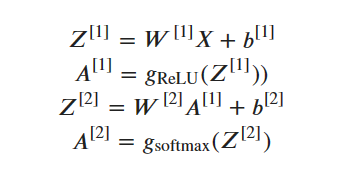

##backward propagation

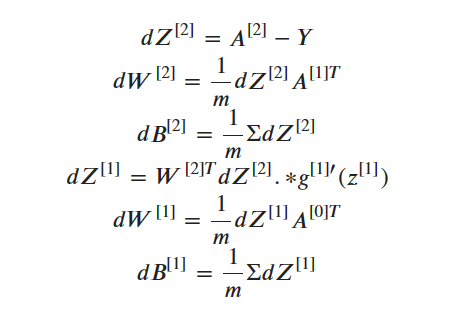

In [56]:
class NN:
  def __init__(self,dim):
    self.W1 = np.random.rand(10, dim) - 0.5
    self.b1 = np.random.rand(10, 1) - 0.5
    self.W2 = np.random.rand(10, 10) - 0.5
    self.b2 = np.random.rand(10, 1) - 0.5

  def ReLU(self,Z):
      return np.maximum(Z, 0)

  def softmax(self,Z):
      A = np.exp(Z) / sum(np.exp(Z))
      return A

  def fit(self,x,y,test_x,test_y,iterations,alpha):
      for i in range(iterations):
          self.forward_prop(x)
          self.backward_prop(x,y)
          self.update_params(alpha)
          if self.test_accuracy(y) == 1.0:
            break
          if i % 200 == 0:
              print("Iteration: ", i)
              print('train accuracy',self.test_accuracy(y))
              print('test accuracy',self.val_accuracy(test_x, test_y))
      
  def forward_prop(self, X):
      self.Z1 = self.W1.dot(X) + self.b1
      self.A1 = self.ReLU(self.Z1)
      self.Z2 = self.W2.dot(self.A1) + self.b2
      self.A2 = self.softmax(self.Z2)

  def ReLU_deriv(self,Z):
      return Z > 0

  def one_hot(self,Y):
      one_hot_Y = np.zeros((Y.size, Y.max() + 1))
      one_hot_Y[np.arange(Y.size), Y] = 1
      one_hot_Y = one_hot_Y.T
      return one_hot_Y

  def backward_prop(self,X,Y):
      m = X.shape[1]
      one_hot_Y = self.one_hot(Y)
      dZ2 = self.A2 - one_hot_Y
      self.dW2 = 1 / m * dZ2.dot(self.A1.T)
      self.db2 = 1 / m * np.sum(dZ2)
      dZ1 = self.W2.T.dot(dZ2) * self.ReLU_deriv(self.Z1)
      self.dW1 = 1 / m * dZ1.dot(X.T)
      self.db1 = 1 / m * np.sum(dZ1)

  def update_params(self,alpha):
      self.W1 -= alpha * self.dW1
      self.b1 -= alpha * self.db1    
      self.W2 -= alpha * self.dW2  
      self.b2 -= alpha * self.db2

  def get_predictions(self,X):
      Z1 = self.W1.dot(X) + self.b1
      A1 = self.ReLU(Z1)
      Z2 = self.W2.dot(A1) + self.b2
      A2 = self.softmax(Z2)
      return np.argmax(A2, 0)
      
  def test_accuracy(self,Y):
      predictions = np.argmax(self.A2,0)
      return self.accuracy(predictions,Y)
  def val_accuracy(self,X,Y):
      predictions = self.get_predictions(X)
      return self.accuracy(predictions,Y)  
  def accuracy(self,predictions,Y):
      return np.sum(predictions == Y) / Y.size        

In [57]:
model = NN(data.train_X.shape[0])

In [58]:
model.fit(data.train_X,data.train_Y,data.test_X,data.test_Y,5000,0.06)

Iteration:  0
train accuracy 0.082
test accuracy 0.10674157303370786
Iteration:  200
train accuracy 0.871
test accuracy 0.7752808988764045
Iteration:  400
train accuracy 0.946
test accuracy 0.848314606741573
Iteration:  600
train accuracy 0.977
test accuracy 0.8932584269662921
Iteration:  800
train accuracy 0.992
test accuracy 0.9044943820224719
Iteration:  1000
train accuracy 0.997
test accuracy 0.9044943820224719
Iteration:  1200
train accuracy 0.999
test accuracy 0.9044943820224719


In [59]:
def test_prediction(index):
    current_image = data.test_X[:, index, None]
    prediction = model.get_predictions(data.test_X[:, index, None])
    label = data.test_Y[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  2
Label:  2


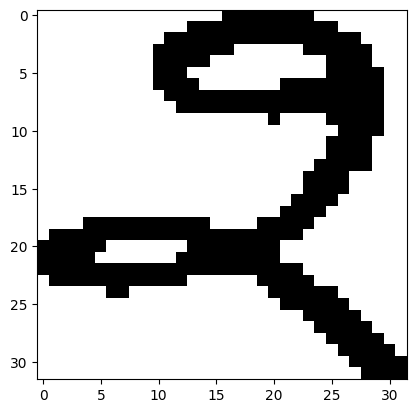

True
Prediction:  1
Label:  1


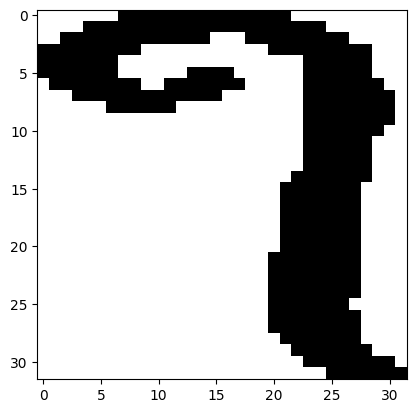

True
Prediction:  2
Label:  2


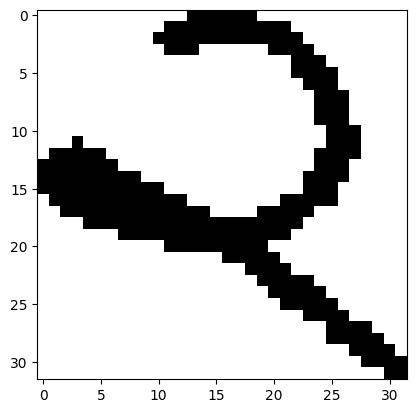

True
Prediction:  6
Label:  2


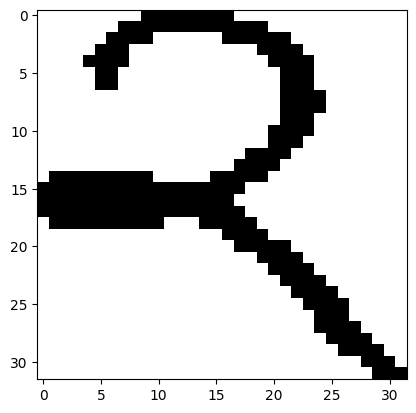

False
Prediction:  4
Label:  4


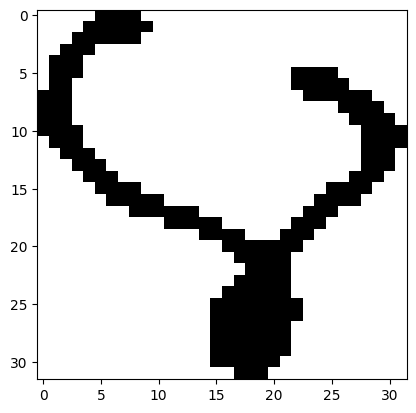

True
Prediction:  9
Label:  9


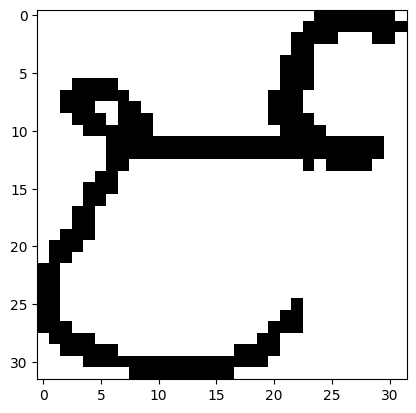

True
Prediction:  1
Label:  1


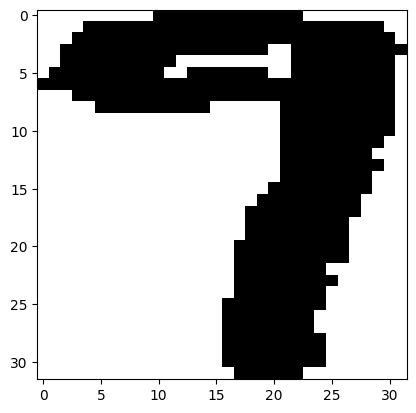

True
Prediction:  9
Label:  9


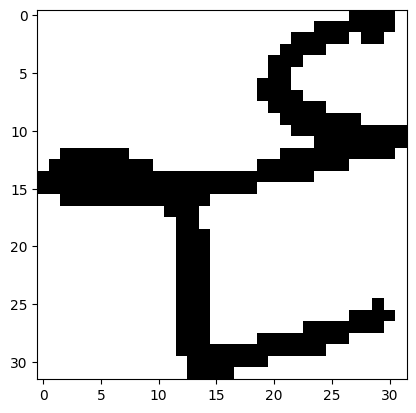

True
Prediction:  0
Label:  0


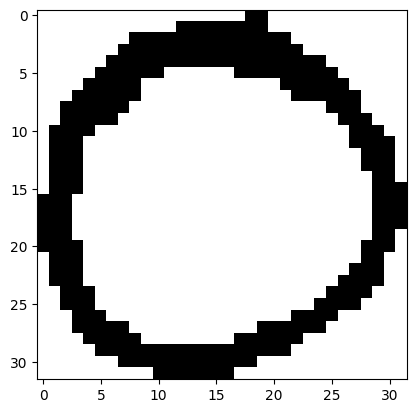

True
Prediction:  4
Label:  4


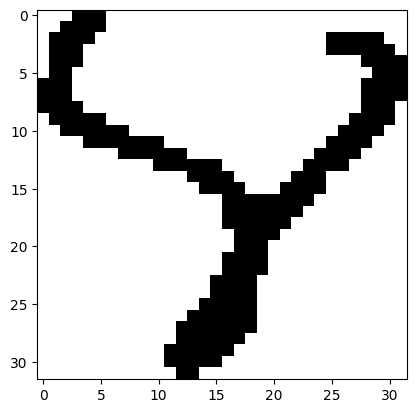

True
Prediction:  3
Label:  3


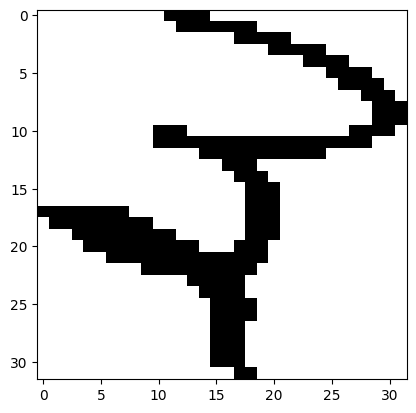

True
Prediction:  4
Label:  4


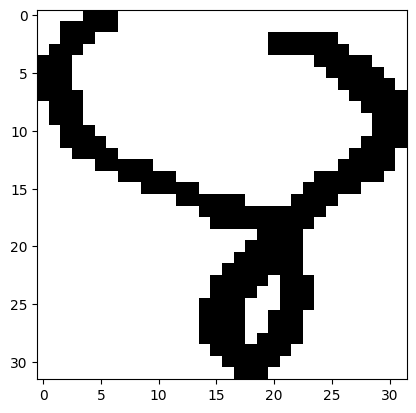

True
Prediction:  4
Label:  4


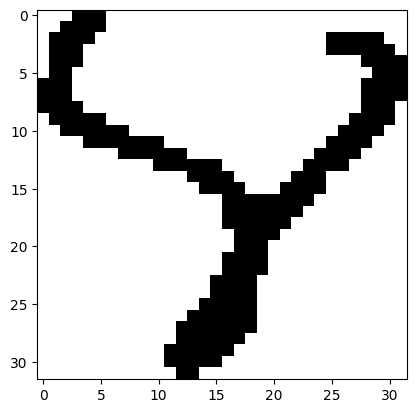

True
Prediction:  2
Label:  2


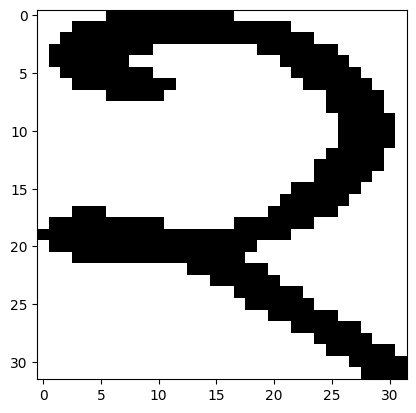

True
Prediction:  9
Label:  9


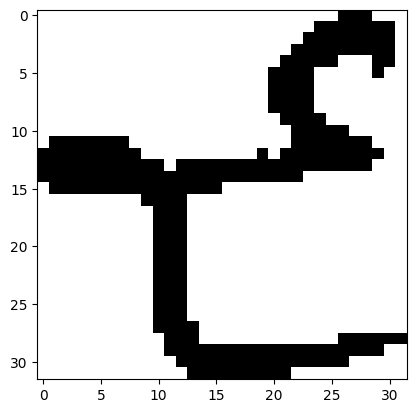

True
Prediction:  3
Label:  3


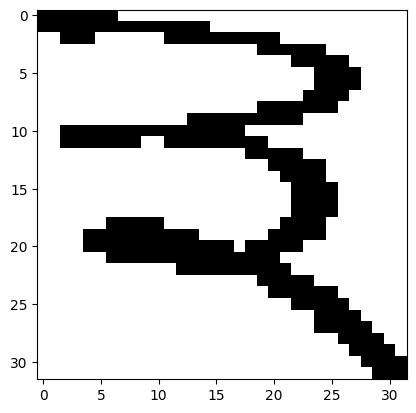

True
Prediction:  2
Label:  2


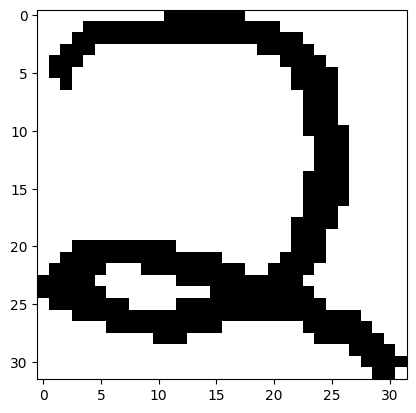

True
Prediction:  3
Label:  3


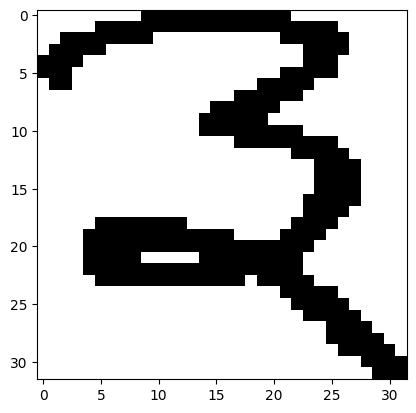

True
Prediction:  4
Label:  4


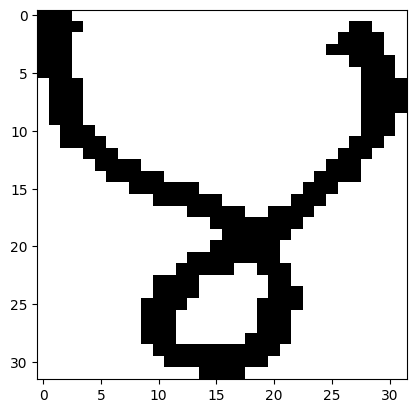

True
Prediction:  7
Label:  1


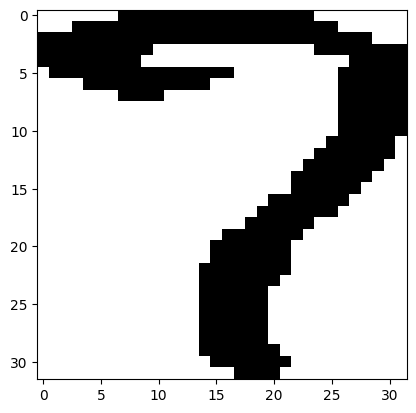

False
Prediction:  1
Label:  1


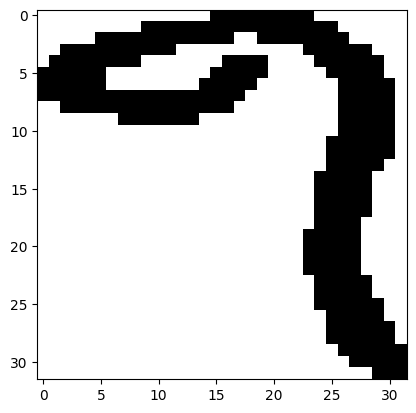

True
Prediction:  3
Label:  3


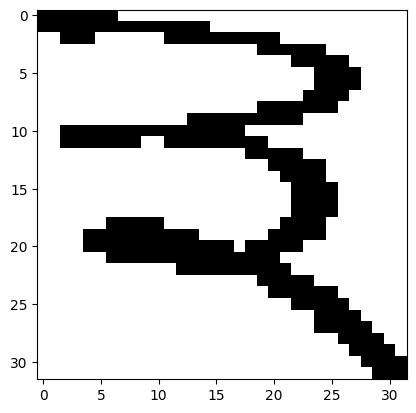

True
Prediction:  4
Label:  4


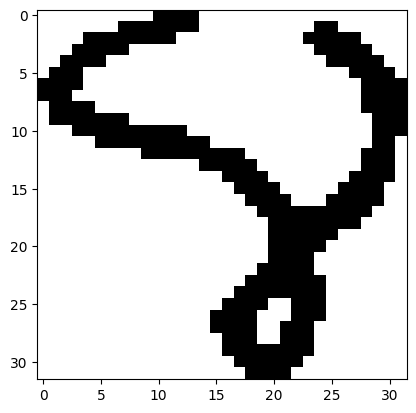

True
Prediction:  1
Label:  1


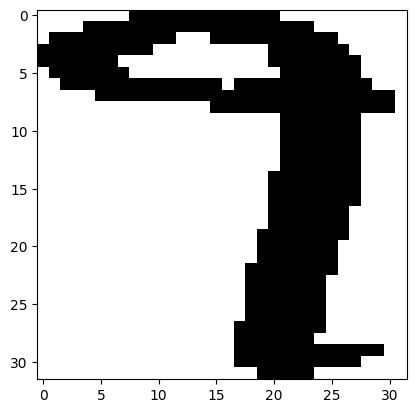

True
Prediction:  2
Label:  2


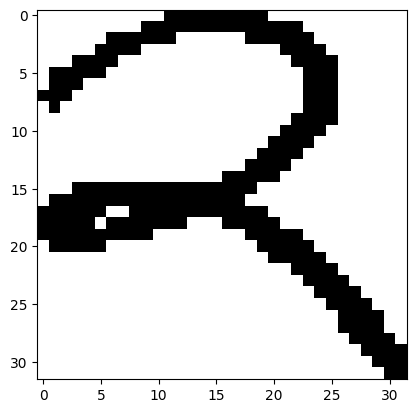

True
Prediction:  9
Label:  9


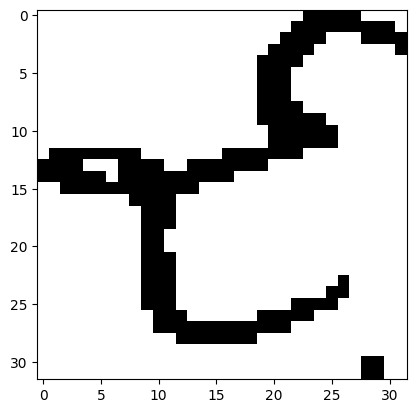

True
Prediction:  4
Label:  4


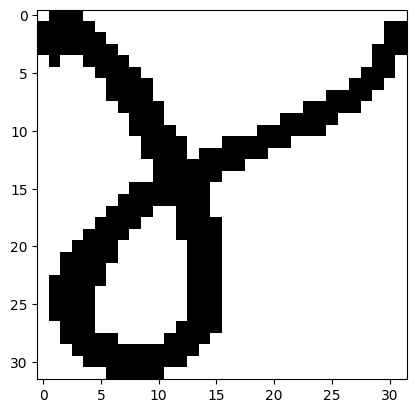

True
Prediction:  3
Label:  3


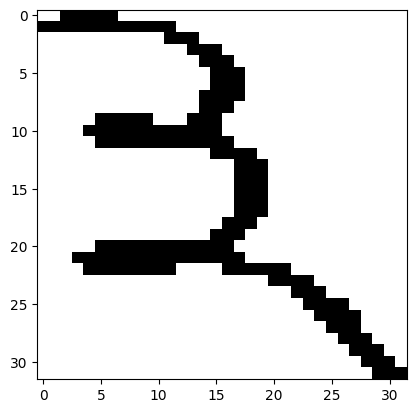

True
Prediction:  9
Label:  9


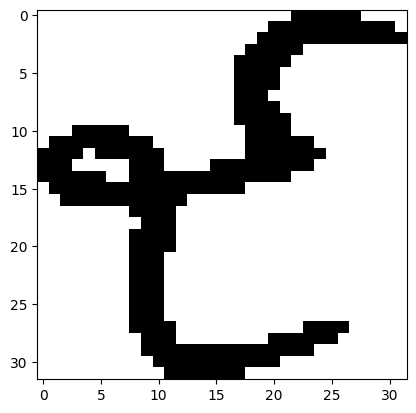

True
Prediction:  4
Label:  4


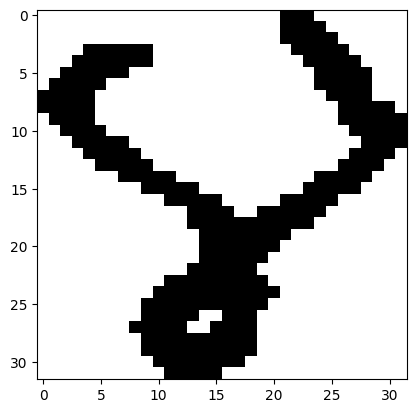

True
Prediction:  1
Label:  1


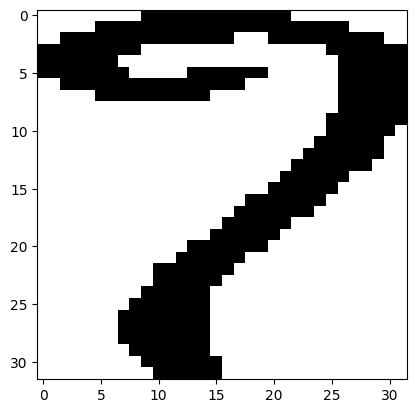

True
Prediction:  7
Label:  1


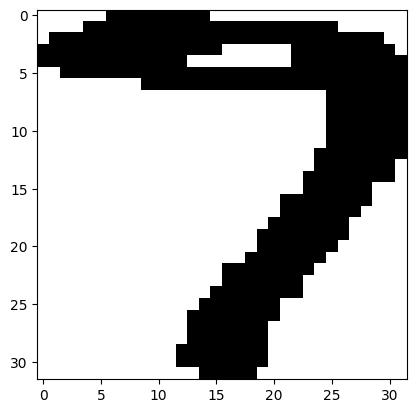

False
Prediction:  3
Label:  3


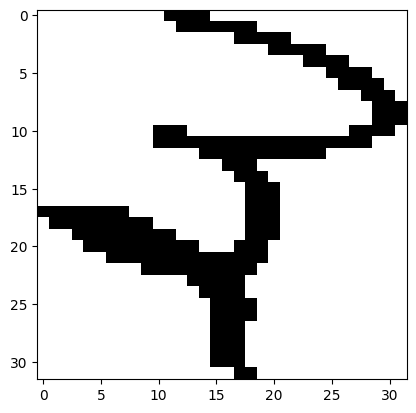

True
Prediction:  9
Label:  9


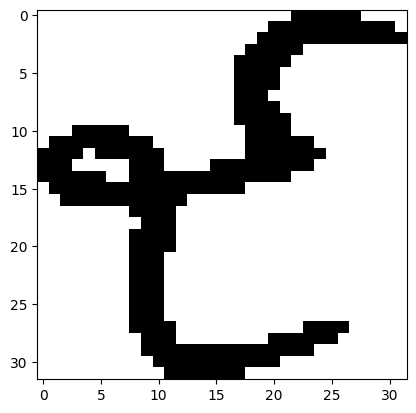

True
Prediction:  9
Label:  9


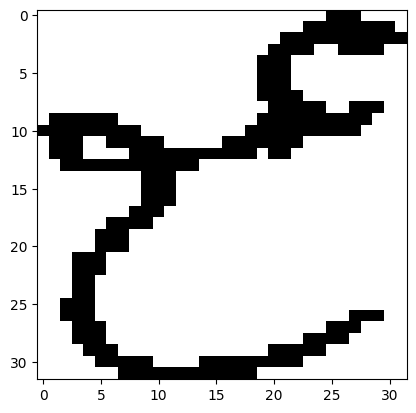

True
Prediction:  0
Label:  0


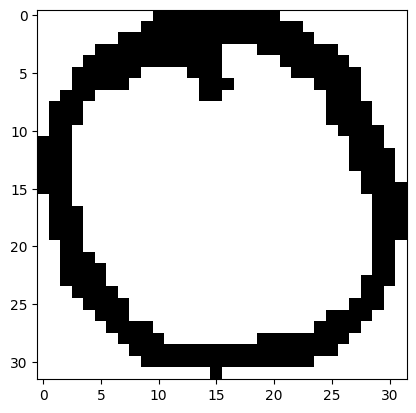

True
Prediction:  2
Label:  2


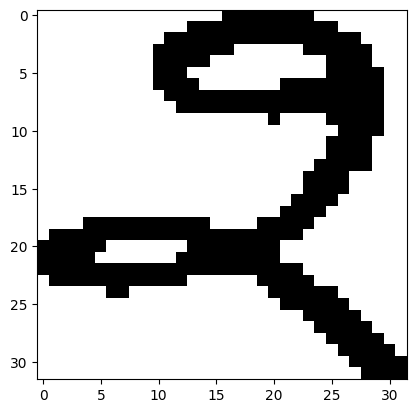

True
Prediction:  9
Label:  9


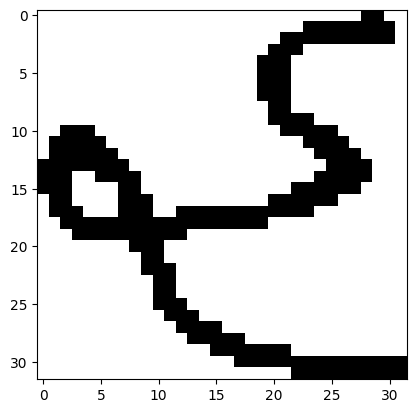

True
Prediction:  4
Label:  4


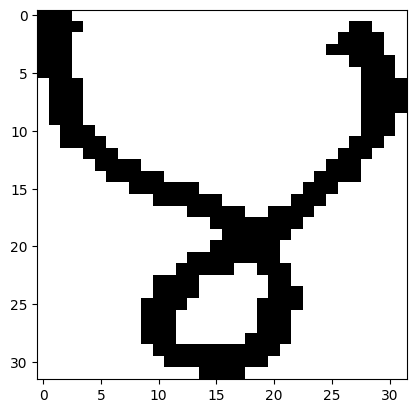

True
Prediction:  7
Label:  1


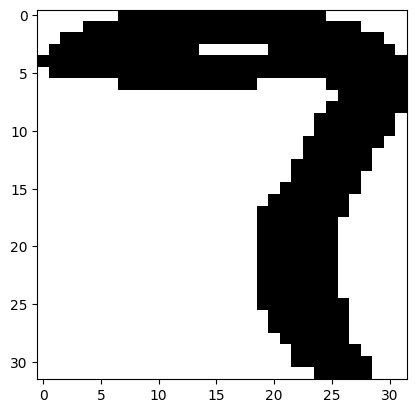

False
Prediction:  3
Label:  3


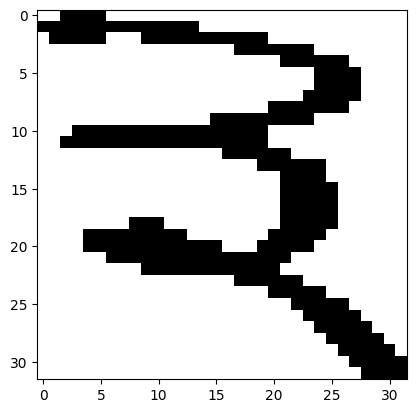

True
Prediction:  1
Label:  1


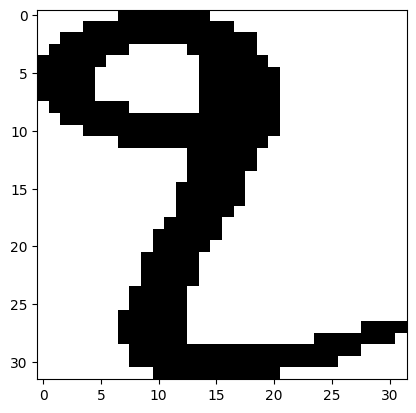

True
Prediction:  1
Label:  1


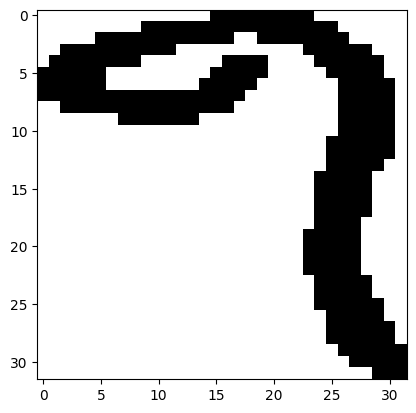

True
Prediction:  2
Label:  2


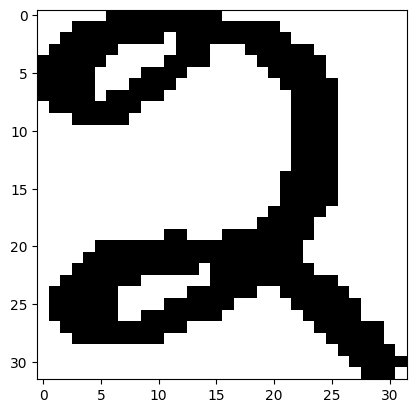

True
Prediction:  1
Label:  1


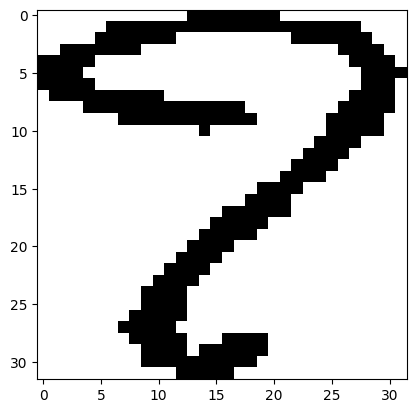

True
Prediction:  9
Label:  9


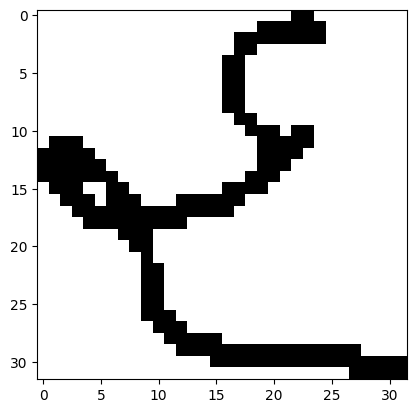

True
Prediction:  0
Label:  0


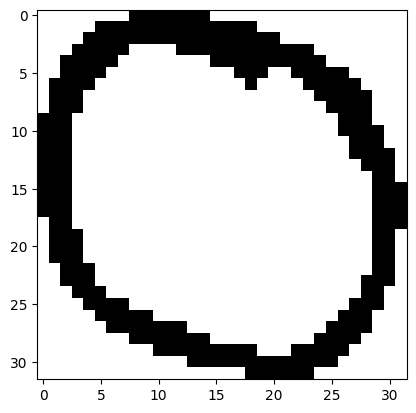

True
Prediction:  9
Label:  9


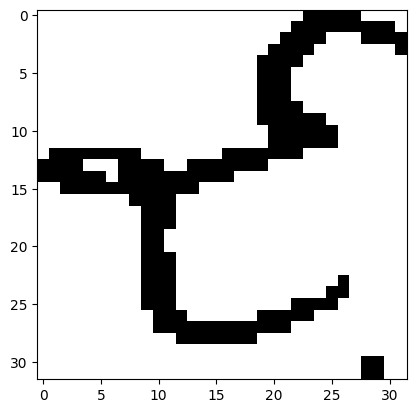

True
Prediction:  3
Label:  3


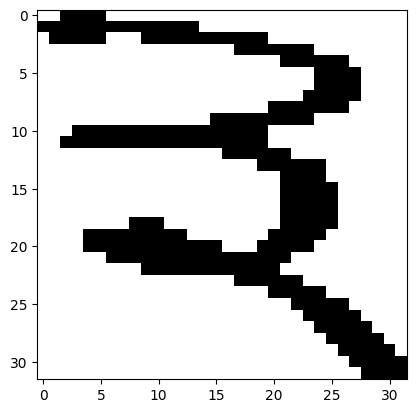

True
Prediction:  9
Label:  9


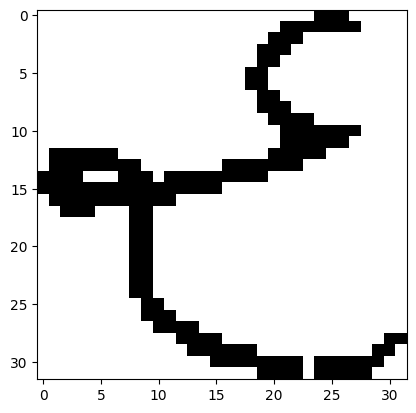

True


In [60]:
result  = []
for i in range(50):
  test_prediction(np.random.randint(100))